<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

---


# 선형회귀(Linear Regression)

* 선형회귀모델을 이해합니다.
* 지도학습(Supervised Learning)을 이해합니다.
* 회귀모델에 기준모델을 설정할 수 있습니다.
* Scikit-learn을 이용해 선형 회귀 모델을 만들어 사용하고 해석할 수 있습니다.

## Warm up

### 다음 영상을 시청해 주세요
- ["An Introduction to Linear Regression Analysis"](https://youtu.be/zPG4NjIkCjc)
- ["How to calculate linear regression using least square method"](https://youtu.be/JvS2triCgOY)
    - 회귀선을 그리기 위한 계수들 ($b_0$, $b_1$) 구하는 공식을 눈여겨 보세요.

- ["What is tabular data?"](https://www.youtube.com/watch?v=ILTfP3jdVKo)
    - Tabular data의 특징을 세 부분으로 나누면?
    
- [Comparing Classification and Regression](https://youtu.be/G_0W912qmGc)
    - 지도학습(Supervised Learning)에는 두 가지 방식이 있습니다: 회귀(Regression) and 분류(Classification)
        - “How Much / How Many?” (회귀)
        - “Is this A or B?” (분류)
    - 회귀분석과, 분류의 타겟 특성은 무엇이 다른가요?

#### 이번 강의에서 사용하는 데이터에 대한 설명을 읽어 보세요.

["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

#### 사용하는 변수는 다음과 같습니다.
- SalePrice: 우리가 예측해야 하는 타겟값으로 주택판매가격(달러) 입니다.
- LotArea: 집과 마당의 사이즈(square feet)
- GrLivArea: 지상 생활면적(square feet)

---

## 주택의 판매 가격을 어떻게 예측할 수 있을까요?

오늘 사용할 데이터를 불러오겟습니다.

In [1]:
import pandas as pd
# 주어진 url 주소를 이용해 house prices 데이터를 가져옵니다.
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')
df_t = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_test.csv')

In [2]:
## head()로 데이터를 살펴봅니다.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
## 여러 특성 중 'GrLivArea', 'LotArea', 'SalePrice'를 사용합니다.
df = df[['GrLivArea', 'LotArea', 'SalePrice']]
df_t = df[['GrLivArea', 'LotArea']]

In [5]:
## 테이블 형테 출력, 이런 형태의 데이터를 tabular data 라고 말합니다.
df

,GrLivArea,LotArea,SalePrice
0,1710,8450,208500
1,1262,9600,181500
2,1786,11250,223500
3,1717,9550,140000
4,2198,14260,250000
...,...,...,...
1455,1647,7917,175000
1456,2073,13175,210000
1457,2340,9042,266500
1458,1078,9717,142125


### 주택 판매 가격을 예측하려고 할 때 여러분은 다음과 같은 방법을 사용할 수 있습니다

#### 1. 기존 경험을 바탕으로 예측

한마디로 대충 어림짐작하는 것 입니다. 예를 들어 밤 하늘에 달무리가 진 것을 보고 다음날 날씨가 흐릴 것을 예측하는 것과 같습니다.

보통 좋은 결과를 내기도 하지만 사람마다 편견이 존재하며 오류에 빠질 위험이 높습니다.

- 이 옷은 [남자 or 여자] 아기 옷 일까요?

<img src="https://i.imgur.com/3Y7qKqN.png?1" width="300"/>


#### 2. 통계정보를 활용

`SalePrice`의 통계 정보를 확인해 보겠습니다.

In [6]:
# SalePrice의 최소, 최대, 평균, 중앙값 계산
df['SalePrice'].min(), df['SalePrice'].max(), df['SalePrice'].mean(), df['SalePrice'].median()

(34900, 755000, 180921.19589041095, 163000.0)

In [7]:
# pandas 포멧팅을 사용하면, 판다스 객체들의 결과에서 쉼표를 넣고 소숫점 아래는 생략하도록 설정할 수 있습니다.
# float 형식 소숫점 1자리, 쉼표 포함
pd.set_option('display.float_format', '{:,.1f}'.format)

# 기본 셋팅으로 돌아오기 위해서
# pd.set_option('display.float_format', None) 

In [8]:
## SalePrice 통계 정보를 요약해서 확인할 수도 있습니다.
df['SalePrice'].describe()

count     1,460.0
mean    180,921.2
std      79,442.5
min      34,900.0
25%     129,975.0
50%     163,000.0
75%     214,000.0
max     755,000.0
Name: SalePrice, dtype: float64

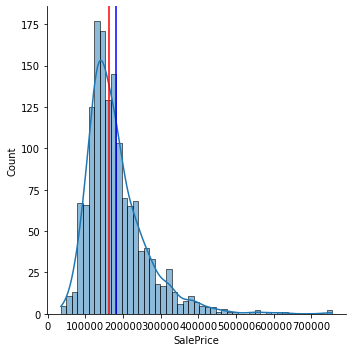

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## SalePrice의 확률밀도함수를 그려보겠습니다
sns.displot(df['SalePrice'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['SalePrice'].mean(), color='blue')
plt.axvline(df['SalePrice'].median(), color='red');

만일 가격을 처음으로 예측한다고 할 때, 가장 간단하고 직관적인 방법으로 평균이나 중간값을 이용해 보는 것도 좋은 선택일 것입니다.

#### 기준모델(Baseline Model)
이렇게 예측 모델을 구체적으로 만들기 전에 가장 간단하면서도 직관적이면서 최소한의 성능을 나타내는 기준이 되는 모델을 기준모델 이라고 합니다.
여기서는 평균값을 기준으로 사용해서 평균기준모델이라고 말할 수 있겠습니다.

참고로 문제별로 기준모델은 보통 다음과 같이 설정합니다.
- 분류문제: 타겟의 최빈 클래스
- 회귀문제: 타겟의 평균값
- 시계열회귀문제: 이전 타임스탬프의 값

In [10]:
## predict: 우리가 정한 기준모델인 평균으로 예측을 합니다
predict = df['SalePrice'].mean()

In [11]:
## 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장합니다
errors = predict - df['SalePrice']

In [12]:
errors

0      -27,578.8
1         -578.8
2      -42,578.8
3       40,921.2
4      -69,078.8
          ...   
1455     5,921.2
1456   -29,078.8
1457   -85,578.8
1458    38,796.2
1459    33,421.2
Name: SalePrice, Length: 1460, dtype: float64

In [13]:
## mean_absolute_error(MAE), error에 절대값을 취한 후 평균을 계산합니다.
mean_absolute_error = errors.abs().mean()

Mean Absolute Error(MAE, 평균절대오차) 는 예측 error 의 절대값 평균을 나타냅니다.

$$Error = (price - guess)$$

\begin{align}mae = (\frac{1}{n})\sum_{i=1}^{n}\left | price_{i} - guess_{i} \right |\end{align}

기준모델을 그려보겠습니다.

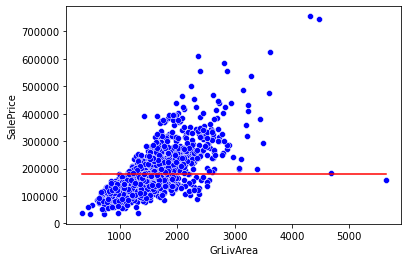

In [14]:
x = df['GrLivArea']
y = df['SalePrice']

predict = df['SalePrice'].mean()
errors = predict - df['SalePrice']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [15]:
print(f'예측한 주택 가격이 ${predict:,.0f}이면 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $180,921이면 절대평균에러가 $57,435임을 확인할 수 있습니다.


평균 예측은 에러가 상당히 크다는 것을 알 수 있었습니다.

혹시 주택 가격이 전체공간크기(LotArea)와 같은 다른 특성과 어떤 상관관계(dependent)가 있을까요? 이 관계를 시각적으로 살펴보겠습니다.

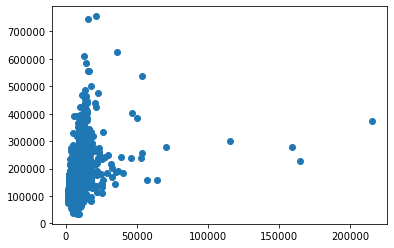

In [16]:
## matplotlib scatter plot: LotArea, SalePrice
plt.scatter(df['LotArea'], df['SalePrice']);

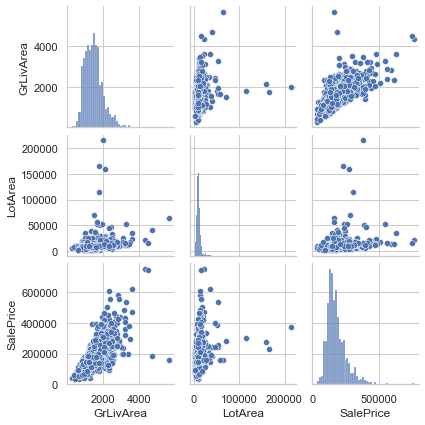

In [17]:
sns.set(style='whitegrid', context='notebook')
cols = ['GrLivArea', 'LotArea','SalePrice']
sns.pairplot(df[cols], height=2);

#### 3. 예측모델(Predictive Model) 활용

scatterplot에 가장 잘 맞는(best fit) 직선을 그려주면 그것이 회귀 예측모델이 됩니다.

- [scatterplot](https://www.plotly.express/plotly_express/#plotly_express.scatter)

그럼 회귀직선은 어떻게 만들 수 있을까요? 회귀분석에서 중요한 개념은 예측값과 잔차(residual) 입니다.
예측값은 만들어진 모델이 추정하는 값이고, 잔차는 예측값과 관측값 차이 입니다.(오차(error)는 모집단에서의 예측값과 관측값 차이를 말합니다.)

회귀선은 잔차 제곱들의 합인 RSS(residual sum of squares)를 최소화 하는 직선입니다. RSS는 SSE(Sum of Square Error)라고도 말하며 이 값이 회귀모델의 비용함수(Cost function)가 됩니다. 머신러닝에서는 이렇게 비용함수를 최소화 하는 모델을 찾는 과정을 학습이라고 합니다.

${\displaystyle \operatorname {RSS} =\sum _{i=1}^{n}(\varepsilon _{i})^{2}=\sum _{i=1}^{n}(y_{i}-f(x_{i}))^{2}=\sum _{i=1}^{n}(y_{i}-(\alpha x_{i} + \beta))^{2}}$

여기서 계수 $\alpha$ 와 $\beta$ 는 RSS를 최소화 하는 값으로 모델 학습을 통해서 얻어지는 값입니다.

이렇게 잔차제곱합을 최소화하는 방법을 최소제곱회귀 혹은 Ordinary least squares(OLS)라고 부릅니다.

OLS는 계수 계산을 위해 다음 공식을 사용합니다.(유도과정을 알고 싶으면 참고자료를 확인하세요)

$\beta =\displaystyle {\bar {y}}-\alpha{\bar {x}}$,

$\alpha ={\frac {S_{xy}}{S_{xx}}}$

${\displaystyle S_{xy}=\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}$,   ${\displaystyle S_{xx}=\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}$

최소제곱법으로 선형 회귀계수를 쉽게 구할 수 있습니다.

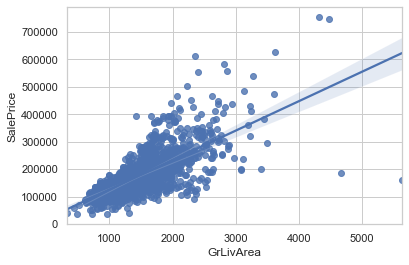

In [18]:
## Seaborn regplot으로 그리면, 
sns.regplot(x=df['GrLivArea'], y=df['SalePrice']);

In [19]:
## GrLivArea > 3500 & GrLivArea < 4500 사이의 데이터를 보겠습니다.
df[(df['GrLivArea'] > 3500) & (df['GrLivArea'] < 4500)]

,GrLivArea,LotArea,SalePrice
185,3608,22950,475000
691,4316,21535,755000
1169,3627,35760,625000
1182,4476,15623,745000


선형회귀는 주어져 있지 않은 점의 함수값을 보간(**interpolate**) 하여 예측하는데 도움을 줍니다.

예를 들어 GrLivArea 3626 ~ 4315 sqft 사이에 주택의 가격 정보가 없습니다. 이때 선형회귀 모델을 사용해 4000 sqft 주택 가격을 어림잡아 예측해 볼 수 있습니다.


물론 선형회귀모델은 기존 데이터의 범위를 넘어서는 값을 예측하기 위한 외삽(**extrapolate**)도 제공해줍니다.
저희가 지금 다루는 데이터에는 6000 sqft 이상되는 주택의 거래 정보가 없습니다.

In [20]:
df[(df['GrLivArea'] > 6000)].sort_values('GrLivArea')

,GrLivArea,LotArea,SalePrice


이런 경우는 어떻게 예측해야 할까요?

선형회귀 직선은 독립변수(independent variable, x)와 종속변수(dependent variable, y) 간의 관계를 요약해 줍니다.

- **종속변수는 반응(Response)변수, 레이블(Label), 타겟(Target)등으로 불립니다.**
- **독립변수는 예측(Predictor)변수, 설명(Explanatory), 특성(feature) 등으로 불립니다.**

## 그럼 scikit-learn을 사용해서 선형회귀모델을 만들어 보겠습니다

scikit-learn은 머신러닝 모델을 만드는데 가장 많이 사용하는 라이브러리로 이번 섹션에서 계속 활용됩니다.

#### scikit-Learn을 활용해 모델을 만들고 데이터를 분석하기 위해서는 다음과 같은 데이터 구조를 사용해야 합니다:

<img src="https://www.researchgate.net/publication/301946040/figure/fig1/AS:362519232303116@1463442728351/Data-representation-in-scikit-learn.png" alt="Data representation in scikit-learn"/>

- 특성 데이터와 타겟 데이터를 나누어 줍니다.

- 특성행렬은 주로 `X` 로 표현하고 보통 2-차원 행렬입니다(`[n_samples, n_features]`). 주로 NumPy 행령이나 Pandas 데이터프레임으로 표현합니다.

- 타겟배열은 주로 y로 표현하고 보통 1타원 형태(`n_samples`) 입니다. 주로 Numpy 배열이나 Pandas Series로 표현합니다.


#### scikit-learn에는 수많은 머신러닝 모델이 구현되어 있는데 모두 유사한 프로세스를 통해서 사용할 수 있습니다. 

- 우선 여러분께서 풀어야 하는 문제를 풀기에 적합한 모델을 선택하여 클래스를 찾아본 후 관련 속성이나 하이퍼파라미터를 확인해 봅니다.
- 문제에 따라서 약간 차이가 있겠지만 위에서 살펴본 것과 같이 데이터를 준비합니다.
- `fit()` 메소드를 사용하여 모델을 학습합니다.
- 'predict()' 메소드를 사용하여 새로운 데이터를 예측합니다.

이런 프로세스는 앞으로도 계속 연습할 것이기 때문에 잘 알아 두시기 바랍니다.
- [Basics of the API](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)

## Simple Linear Regression (단순 선형 회귀)

위에 언급한 방법에 따라서 머신러닝모델을 만들어 봅시다.

- [Scikit-Learn LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [21]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression

In [22]:
## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

In [23]:
## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['GrLivArea']
target = ['SalePrice']
X_train = df[feature]
y_train = df[target]

In [24]:
## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

LinearRegression()

In [25]:
## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[4000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

4000 sqft GrLivArea를 가지는 주택의 예상 가격은 $447090 입니다.


In [26]:
## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test = [[x] for x in df_t['GrLivArea']]
y_pred = model.predict(X_test)

In [27]:
## 전체 예측값 입니다.
y_pred

array([[201761.93968805],
       [153767.53887136],
       [209903.84696945],
       ...,
       [269254.06583652],
       [134055.55282165],
       [153124.75671756]])

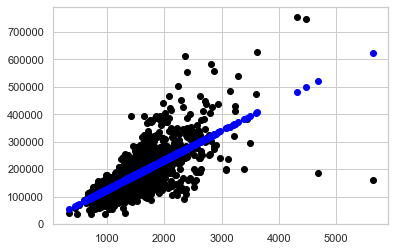

In [28]:
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

저희는 지금 이 [다이어그램](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/text_analytics/general_concepts.html#supervised-learning-model-fit-x-y)에서 표현한 일반적인 머신러닝 프로세스를 수행했습니다. 앞서 실행한 코드와 다이어그램 플로우를 비교해 보세요.


<img src="https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_12.png" width="75%">

머신러닝을 새로운 프로그래밍 패러다임으로 바라볼 수도 있습니다.

<img src="https://pbs.twimg.com/media/ECQDlFOWkAEJzlY.jpg" width="70%">


데이터를 입력하고 어떤 룰에 따라 답을 구해내는 일반적인 프로그래밍과 달리 머신러닝은 데이터와 답을 통해 룰을 찾아내는 방법이라고 볼 수 있습니다.
— [a new programming paradigm](https://livebook.manning.com/book/deep-learning-with-python/chapter-1/)

## 선형회귀모델의 계수(Coefficients)

모델이 주택의 크기와 가격 사이에서 어떤 관계를 학습했을까요?

이 질문에 대한 답을 하기 위해 `LinearRegression` 객체의 `coef_`, `intercept_` 속성을 확인해 보겠습니다.
- [sckit-learn.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [29]:
## 계수(coefficient)
model.coef_

array([[107.13035897]])

In [30]:
## 절편(intercept)
model.intercept_

array([18569.02585649])

#### 예측함수를 만들어 새로운 데이터를 반복해서 예측하고 coefficient의 영향을 설명해 봅시다:

In [31]:
def explain_prediction(sqft):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred

In [32]:
## square_feet = 4000 인 테스트 데이터로 예측
print(explain_prediction(4000))

4000 sqft 주택 가격 예측: $447090 (1 sqft당 추가금: $107)


#### ipywidgets를 사용해서 sqft를 바꾸어 가며 예측해 보겠습니다.

In [33]:
from ipywidgets import interact

# 데코레이터 interact를 추가합니다.
@interact
def explain_prediction(sqft=(500,10000)):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred

interactive(children=(IntSlider(value=5250, description='sqft', max=10000, min=500), Output()), _dom_classes=(…

## 마무리
머신러닝 모델 중 처음으로 단순선형회귀모델에 관해서 배웠습니다.

아직 한 종류의 특성을 사용한 단순한 모델이지만, 다음 시간에 배우게 될 다중선형회귀모델의 중요한 기초가 되니 오늘 배운 개념에 대해 잘 정리시면 도움이 많이 될 것입니다.

## 참고자료

#### 기준모델
- [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)

#### Scikit-Learn
- [Python Data Science Handbook, Chapter 5.2: Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)
- [2.4.2.2. Supervised Learning](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/text_analytics/general_concepts.html#supervised-learning-model-fit-x-y)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

#### 읽어보세요
- [Art of Choosing Metrics in Supervised Models](https://towardsdatascience.com/art-of-choosing-metrics-in-supervised-models-part-1-f960ae46902e)
- [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)

#### 최소제곱법
- [수학산책-최소제곱법](https://terms.naver.com/entry.nhn?cid=58944&docId=3569970&categoryId=58970)

#### (참고) 더 세련된 시각화툴: Plotly
- [Plotly Express](https://plot.ly/python/plotly-express/)
- [plotly_express.scatter](https://www.plotly.express/plotly_express/#plotly_express.scatter)

#### ipywidgets interact
- [Using Interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Using-Interact)
